<a href="https://colab.research.google.com/github/FrozenFalcon-Byte/Improving-DL-Model-Efficiency/blob/main/zero_weightss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=250, noise=0.25, shuffle=True, random_state=42)

In [4]:
X.shape

(250, 2)

In [5]:
y.shape

(250,)

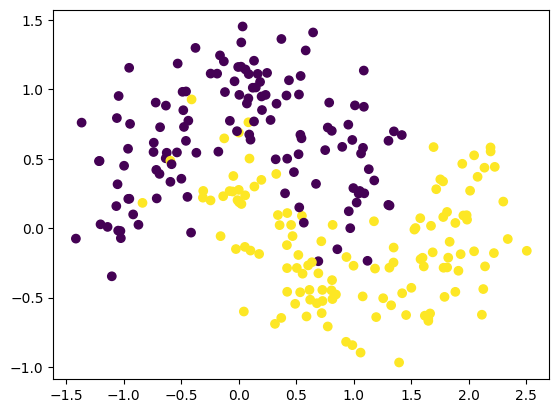

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [36]:
model = Sequential()

In [37]:
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
init = model.get_weights()
init

[array([[ 0.41722703,  0.26492834],
        [-0.67711866, -0.54552764]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.2925315],
        [-0.5915425]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
init[0] = np.zeros(model.get_weights()[0].shape)
init[1] = np.zeros(model.get_weights()[1].shape)
init[2] = np.zeros(model.get_weights()[2].shape)
init[3] = np.zeros(model.get_weights()[3].shape)

In [41]:
model.set_weights(init)

In [42]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit(X, y, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4865 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4816 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4956 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4627 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5254 - loss: 0.6931 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4561 - loss: 0.6933 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4742 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6931


In [45]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.01443933], dtype=float32)]

In [46]:
## weights did not change due to dying relu problem

In [47]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

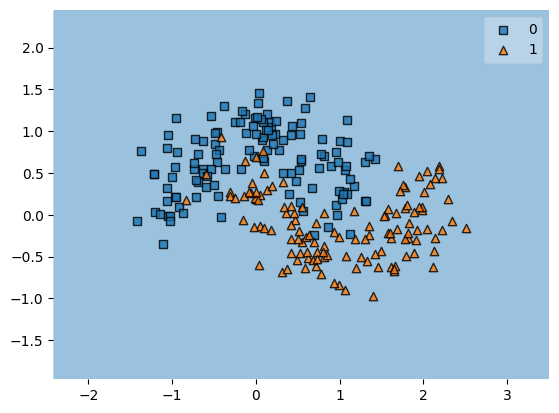

In [48]:
plot_decision_regions(X, y, clf=model)

In [49]:
# it did not classify any data point as 1